In [1]:
import numpy as np 
import tensorflow as tf



c:\Users\jerem\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\jerem\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from keras.datasets import mnist
(X_train,y_train) ,(X_test,y_test) = mnist.load_data()

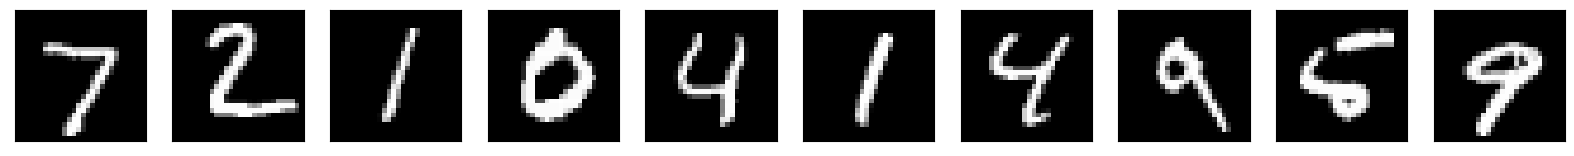

In [3]:
import matplotlib.pyplot as plt

#no of digits = dispaly 
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()
    

In [4]:
print("x_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
x_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


In [5]:
# Reshaping the data to make it compatible with tensorflow
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [6]:
#Since the maximum value of pixel is 255, so we divide each column with 255
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train = np.where(X_train > 0.785, 1, 0)
X_test = np.where(X_test > 0.785, 1, 0)

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [8]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
print("x_train Shape :", X_train.shape)
print("y_train Shape :", y_train.shape)
print("x_test Shape :", X_test.shape)
print("y_test Shape :", y_test.shape)

x_train Shape : (60000, 28, 28, 1)
y_train Shape : (60000, 10)
x_test Shape : (10000, 28, 28, 1)
y_test Shape : (10000, 10)


In [10]:
from tensorflow.keras import models, layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [11]:
img_rows, img_cols, channels = 28, 28, 1 
filters = [6, 32, 80 ,120] 
classes = 10

In [12]:
model = tf.keras.Sequential([
    Conv2D(filters = 64, kernel_size=(5,5),strides=(1,1),padding='same',activation='relu' ),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters = 32, kernel_size=(5,5),strides=(1,1),activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,
         validation_split=0.2,
         epochs=15,
         batch_size=64)

Epoch 1/15
186/750 [======>.......................] - ETA: 29s - loss: 1.8290 - accuracy: 0.5481

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
y_predictions = model.predict(X_test)
y_pred = np.where(y_predictions>0.5,1,0)
acc = accuracy_score(y_pred,y_test)
print(acc)

313/313 [==============================] - 3s 9ms/step
0.9734


In [ ]:

model.save(r"C:\Users\jerem\Desktop\AIVANCITY\PERSONNAL\PROJECTS\DIGIT RECOGNITION\Final Program\model", save_format='tf')

INFO:tensorflow:Assets written to: C:\Users\jerem\Desktop\AIVANCITY\PERSONNAL\PROJECTS\DIGIT RECOGNITION\Final Program\model\assets


INFO:tensorflow:Assets written to: C:\Users\jerem\Desktop\AIVANCITY\PERSONNAL\PROJECTS\DIGIT RECOGNITION\Final Program\model\assets
